<a href="https://colab.research.google.com/github/caneral/DeepLearningCatsvsDogs/blob/main/dogsvscatssmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle Yükleme

In [ ]:
!pip install kaggle

kaggle.json dosyasını yüklemek için

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"caneral","key":"46e063c0cb33a04fb6ae5037d609ab92"}'}

İzin ver

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permission
!chmod 600 ~/.kaggle/kaggle.json

dogsvscats verisetini indir.

Burayı yüklerken kaggle.com da önce telefon numaranı onaylaman gerekiyor. Sonrasında anladım ve kabul ediyorum düğmesine basmalısın.

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 541M/543M [00:03<00:00, 143MB/s]
100% 543M/543M [00:03<00:00, 151MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.4MB/s]
100% 270M/271M [00:03<00:00, 123MB/s]
100% 271M/271M [00:03<00:00, 90.8MB/s]


train.zip dosyasını zipten çıkarmaya yarıyor.

In [ ]:
from zipfile import ZipFile
file_name = "train.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Bitti')

Done


In [ ]:
import os, shutil
# #Sıkıştırılmamış dosyanın bulunduğu dizinin yolu
original_dataset_dir = '/content/train'

#Küçük veri setini koyacağımız dizin
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

#Eğitim setinin dizini
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

#Doğrulama setinin dizini
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Test setinin dizini
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Kedi eğitim setinin dizini
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#Köpek eğitim setinin dizini
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Kedi validation setinin dizini
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#Köpek validation setinin dizini
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Kedi test setinin dizini
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#Köpek test setinin dizini
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#İlk 1000 kedi resmini train_cats_dir dizinine kopyalar.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#Sonraki 500 kedi resmini validation_cats_dir dizinine kopyalar.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#Sonraki 500 kedi resmini test_cats_dir dizinine kopyalar.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#İlk 1000 köpek resmini train_dogs_dir dizinine kopyalar.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#Sonraki 500 köpek resmini validation_dogs_dir dizinine kopyalar.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#Sonraki 500 köpek resmini test_dogs_dir dizinine kopyalar.
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('Toplam train deki kedi resimleri sayısı:',len(os.listdir(train_cats_dir)),'\n')
print('Toplam train deki köpek resimleri sayısı:',len(os.listdir(train_dogs_dir)),'\n')
print('Toplam validation daki kedi resimleri sayısı:',len(os.listdir(validation_cats_dir)),'\n')
print('Toplam validation daki köpek resimleri sayısı:',len(os.listdir(validation_dogs_dir)),'\n')
print('Toplam test deki kedi resimleri sayısı:',len(os.listdir(test_cats_dir)),'\n')
print('Toplam test deki köpek resimleri sayısı:',len(os.listdir(test_dogs_dir)),'\n')

Toplam train deki kedi resimleri sayısı: 1000 

Toplam train deki köpek resimleri sayısı: 1000 

Toplam validation daki kedi resimleri sayısı: 500 

Toplam validation daki köpek resimleri sayısı: 500 

Toplam test deki kedi resimleri sayısı: 500 

Toplam test deki köpek resimleri sayısı: 500 



2000 eğitim, 1000 doğrulama ve 1000 test resmimiz var.

# Ağı İnşa Etmek
Yeni katmanları eklemenin nedeni ağın kapasitesini artırmak ve Flatten katmanına öğrenebileceğinden çok daha fazla nitelik haritası göndermemek adına boyutu küçültmek içindir.

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (3,3),#kernel boyutu
                        activation='relu',
                        input_shape=(150,150,3)))#150x150 tamamen sıradan bir seçim.
#1.katmandaki parametre sayısı = 3*32*3*3+32 = 896 use_bias=true olduğu için. bias ekleniyor.
model.add(layers.MaxPooling2D(2,2))
#2.katman boyut hesaplama. (148-2*0-3)/2 + 1=74 
model.add(layers.Conv2D(64,
                        (3,3),
                        #strides=(2,1), #Gelen görüntüyü pooling gibi boyutunu azaltır. 
                        activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,
                        (3,3),
                        activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,
                        (3,3),
                        activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Derleme Aşaması

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),#lr=Learning rate(öğrenme katsayısı)
              metrics=['acc'])

## Veri Önişleme
Verileri ondalıklı sayı tipinde tensörlere dönüştürmemiz gerekiyor. Şuanda verileri JPEG formatında disk üzerinde saklanıyor ve ağı beslemeden önce aşağıdaki işlemlerden geçmeleri gerekiyor:


1.   Resim dosyalarını oku.
2.   JPEG içeriğini kodçözerek RGB görüntü noktalarına dönüştür.
3.   Bu noktaları ondalık tensörlere dönüştür.
4.   Görüntü noktalarının değerlerini(0 ile 255 arasında) yeniden ölçekle([0,1]aralığına.)



ImageDataGenerator kullanarak dizinden resimlerin okunması

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)#Tüm resimler 1/255'le ölçeklenir.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #Hedef dizin
    target_size=(150,150), #Tüm resimler 150x150 boyutuna getirilir.
    batch_size=20,#20 görüntüde bir back propagation yapacak. 20*100 = 2000 
    class_mode='binary') #binary_crossentropy loss kullandığımız için ikili etiketler gerekiyor.

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

#Generator un çıktısına bakalım
for data_batch, labels_batch in train_generator:
  print('data batch shape:',data_batch.shape)
  print('labels batch shape:',labels_batch.shape)
  break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Yığın üreteci kullanarak modeli uydurmak

In [ ]:
history = model.fit_generator(#generator kullandığımız için fit yerine fit_generator kullandık.
    train_generator,
    steps_per_epoch=100,#1 epochta 100 tane geriye yayılım yapılacak. 2000/20=100
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)#1000/20 = 50

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 92s 913ms/step - loss: 0.6918 - acc: 0.5241 - val_loss: 0.6877 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 91s 910ms/step - loss: 0.6617 - acc: 0.5852 - val_loss: 0.6576 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 91s 915ms/step - loss: 0.6125 - acc: 0.6623 - val_loss: 0.6062 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 91s 914ms/step - loss: 0.5692 - acc: 0.7096 - val_loss: 0.6136 - val_acc: 0.6400
Epoch 5/30
100/100 [==============================] - 91s 911ms/step - loss: 0.5382 - acc: 0.7247 - val_loss: 0.5822 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 91s 913ms/step - loss: 0.5002 - acc: 0.7517 - val_loss: 0.5876 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 91s 913ms/step - loss: 0.4635 - acc: 0.7943 - val_loss: 0.5581 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 9

# Modeli Kaydetmek

In [ ]:
model.save('cats_and_dogs_small.h5')

# Eğitim kaybı ve başarımını çizdirmek

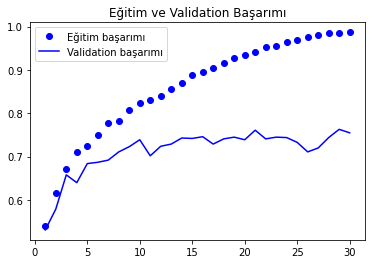

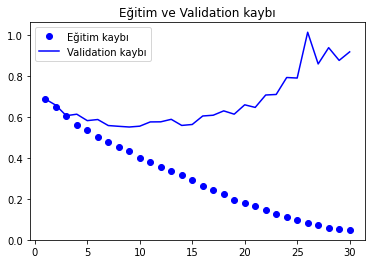

In [ ]:
import matplotlib.pyplot as plt

acc =  history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc,'b',label='Validation başarımı')
plt.title('Eğitim ve Validation Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss,'b',label='Validation kaybı')
plt.title('Eğitim ve Validation kaybı')
plt.legend()

plt.show()

# ImageDataGenerator ile veri seti çeşitlendirmenin yapılması

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,#Derece cinsinden resimlerin rastgele döndürme açısı.
    width_shift_range=0.2,#Resimleri yatayda kaydırma oranı.
    height_shift_range=0.2,#Resimleri dikeyde kaydırma oranı.
    shear_range=0.2,#bükme işlemi
    zoom_range=0.2,#Yakınlaşma işlemi.
    horizontal_flip=True,#Dikeyde resmi döndürme.
    fill_mode='nearest')#fill_mode kaydırma, döndürme vb. işlem sonrası ortaya çıkan fazla görüntü noktalarının nasıl doldurulacağını belirler.

# Çeşitlendirilmiş eğitim resimlerini görüntülemek

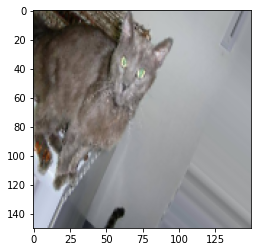

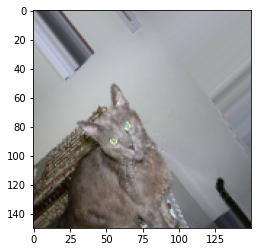

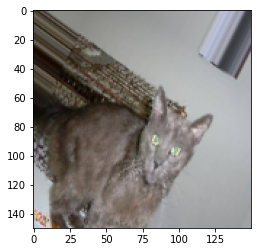

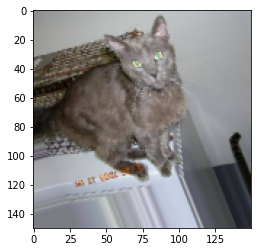

In [ ]:
from keras.preprocessing import image #Görüntü işleme modülü

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3] #Çeşitlendirmek için resim seç.

#Resmi okur ve yeniden boyutlandırır.
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img) #(150, 150, 3) şeklinde Numpy dizinine çevirir.
x = x.reshape((1,) + x.shape) #(1, 150, 150, 3) şekline getirir.
i=0

#Rastgele dönüştürülmüş resim yığınları oluşturur.
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break#Sonsuz döngü oluşacağından bir noktada durdurulması gerekir.
plt.show()

Bunun sonucunda aşırı uydurmayı tamamen kaldırmak mümkün olmayabilir. Daha iyisi için tamamen bağlı katman öncesine `Dropout` katmanı ekleyeceğiz.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (3,3),#kernel boyutu
                        activation='relu',
                        input_shape=(150,150,3)))#150x150 tamamen sıradan bir seçim.
#1.katmandaki parametre sayısı = 3*32*3*3+32 = 896 use_bias=true olduğu için. bias ekleniyor.
model.add(layers.MaxPooling2D(2,2))
#2.katman boyut hesaplama. (148-2*0-3)/2 + 1=74 
model.add(layers.Conv2D(64,
                        (3,3),
                        #strides=(2,1), #Gelen görüntüyü pooling gibi boyutunu azaltır. 
                        activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,
                        (3,3),
                        activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,
                        (3,3),
                        activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))#Eğitim yaparken random olarak bağlantıları kopartıyor, bazı hatlar belirginleşmesin. 0.5
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

Evrişimli sinir ağını veri seti çeşitlendirme üreteci ile eğitmek

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,#Derece cinsinden resimlerin rastgele döndürme açısı.
    width_shift_range=0.2,#Resimleri yatayda kaydırma oranı.
    height_shift_range=0.2,#Resimleri dikeyde kaydırma oranı.
    shear_range=0.2,#bükme işlemi
    zoom_range=0.2,#Yakınlaşma işlemi.
    horizontal_flip=True,)#Dikeyde resmi döndürme.


test_datagen = ImageDataGenerator(rescale=1./255)#Validation verisi çeşitlendirilmiycek.

train_generator = train_datagen.flow_from_directory(
    train_dir, #Hedef dizin
    target_size=(150,150), #Tüm resimler 150x150 boyutuna getirilir.
    batch_size=20,#20 görüntüde bir back propagation yapacak. 20*100 = 2000 
    class_mode='binary') #binary_crossentropy loss kullandığımız için ikili etiketler gerekiyor.

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(#generator kullandığımız için fit yerine fit_generator kullandık.
    train_generator,
    steps_per_epoch=100,#1 epochta 100 tane geriye yayılım yapılacak. 2000/20=100
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)#1000/20 = 50


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 102s 1s/step - loss: 0.7972 - acc: 0.6805 - val_loss: 0.5496 - val_acc: 0.7670
Epoch 2/10
100/100 [==============================] - 102s 1s/step - loss: 0.5898 - acc: 0.7015 - val_loss: 0.5058 - val_acc: 0.7700
Epoch 3/10
100/100 [==============================] - 102s 1s/step - loss: 0.5821 - acc: 0.7090 - val_loss: 0.4806 - val_acc: 0.7780
Epoch 4/10
100/100 [==============================] - 102s 1s/step - loss: 0.5584 - acc: 0.7215 - val_loss: 0.4609 - val_acc: 0.7900
Epoch 5/10
100/100 [==============================] - 102s 1s/step - loss: 0.5430 - acc: 0.7330 - val_loss: 0.4589 - val_acc: 0.7830
Epoch 6/10
100/100 [==============================] - 102s 1s/step - loss: 0.5293 - acc: 0.7405 - val_loss: 0.4773 - val_acc: 0.7730
Epoch 7/10
100/100 [==============================] - 102s 1s/step - loss: 0.5248 - acc: 0.7320 - val_loss: 0.4697 - val_acc: 0.7820
Epoch 8/10
100/100 [==============================] - 101s 1s/step - 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

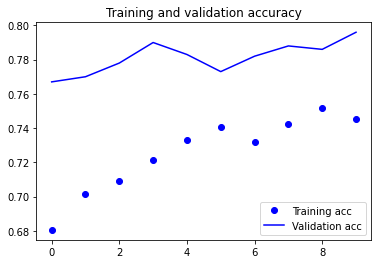

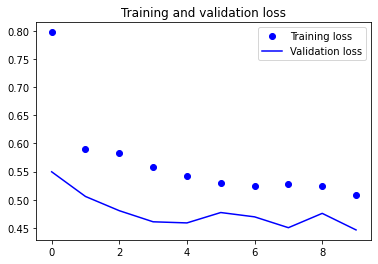

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()